In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



import warnings
warnings.filterwarnings('ignore')

# step 1 : loading the data


In [2]:
boom = pd.read_csv('day.csv')

In [3]:
#glancing the data
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boom.shape

(730, 16)

In [5]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#checking for nulls in the data
boom.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No missing values

In [7]:
boom.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


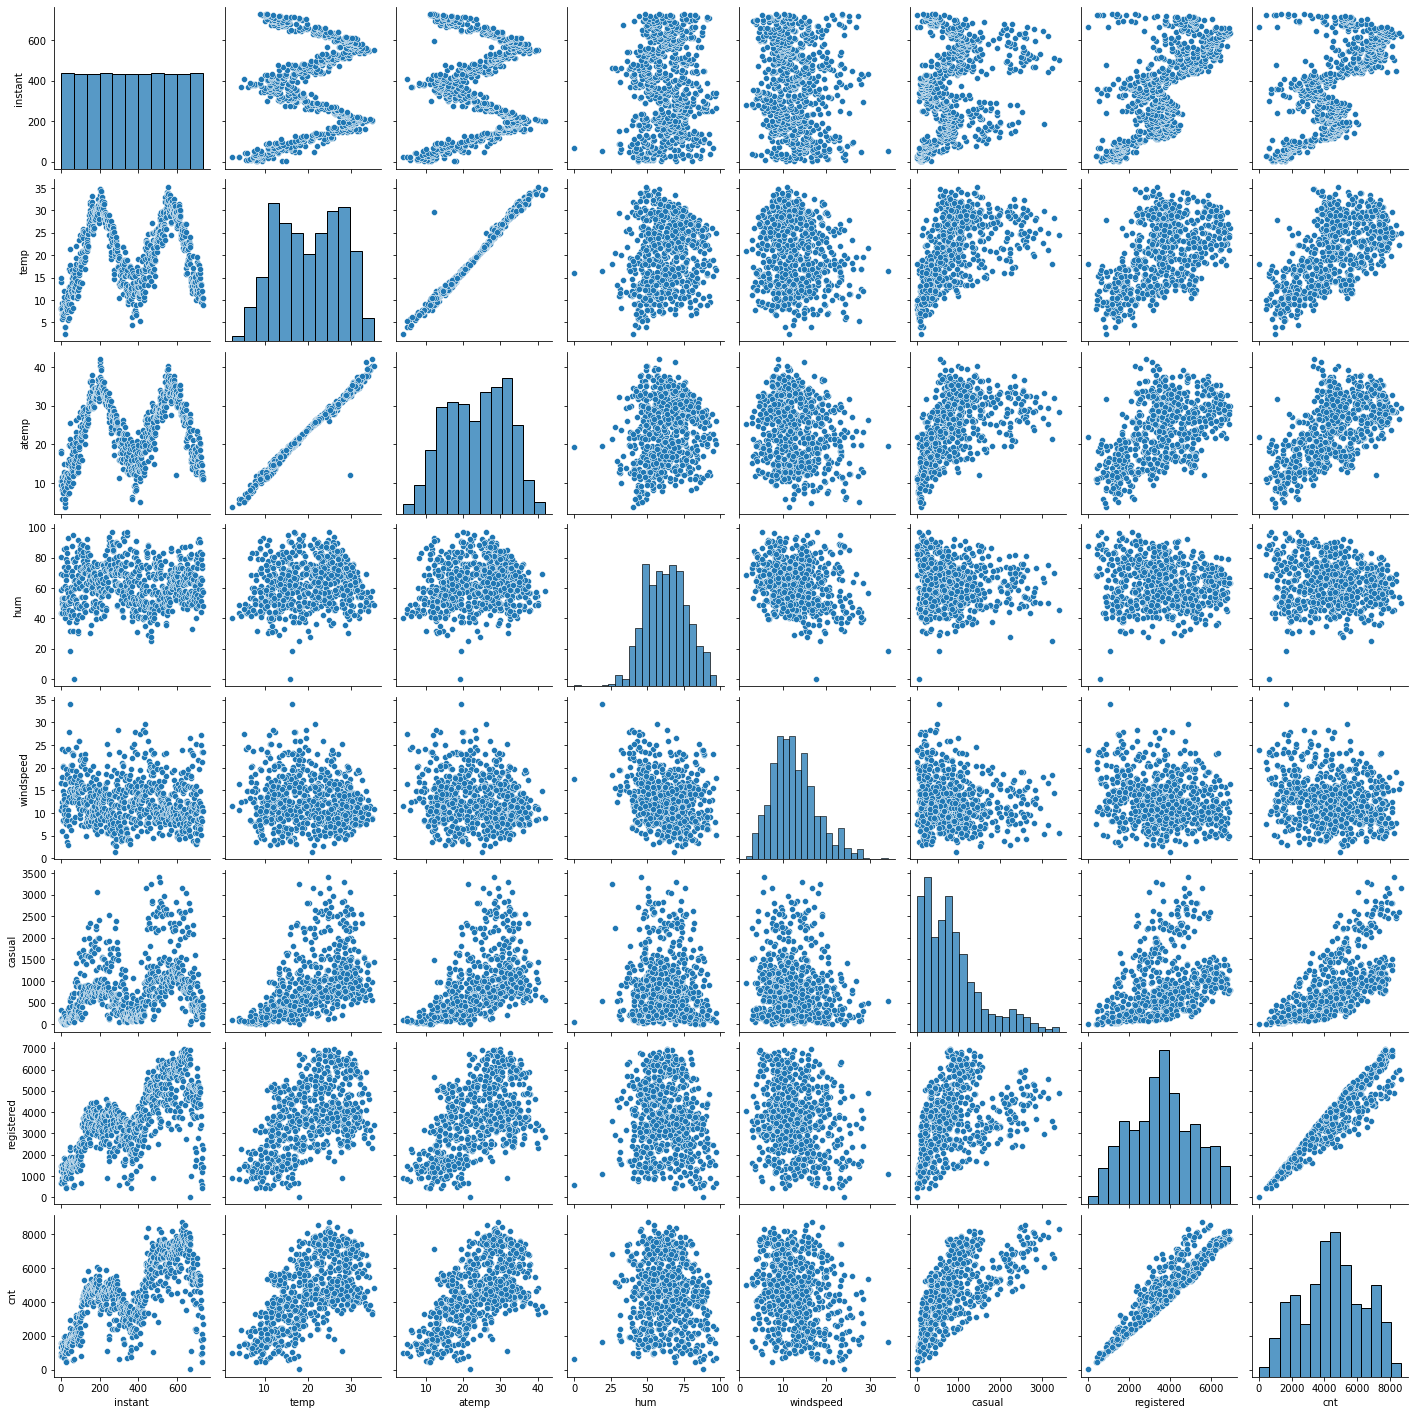

In [8]:
#visualizing the data for numeric variables only
sns.pairplot(boom, vars=["instant","temp","atemp","hum","windspeed","casual","registered","cnt"])
plt.show()

#### from above charts we can conclude there are multiple co-relations in the data set

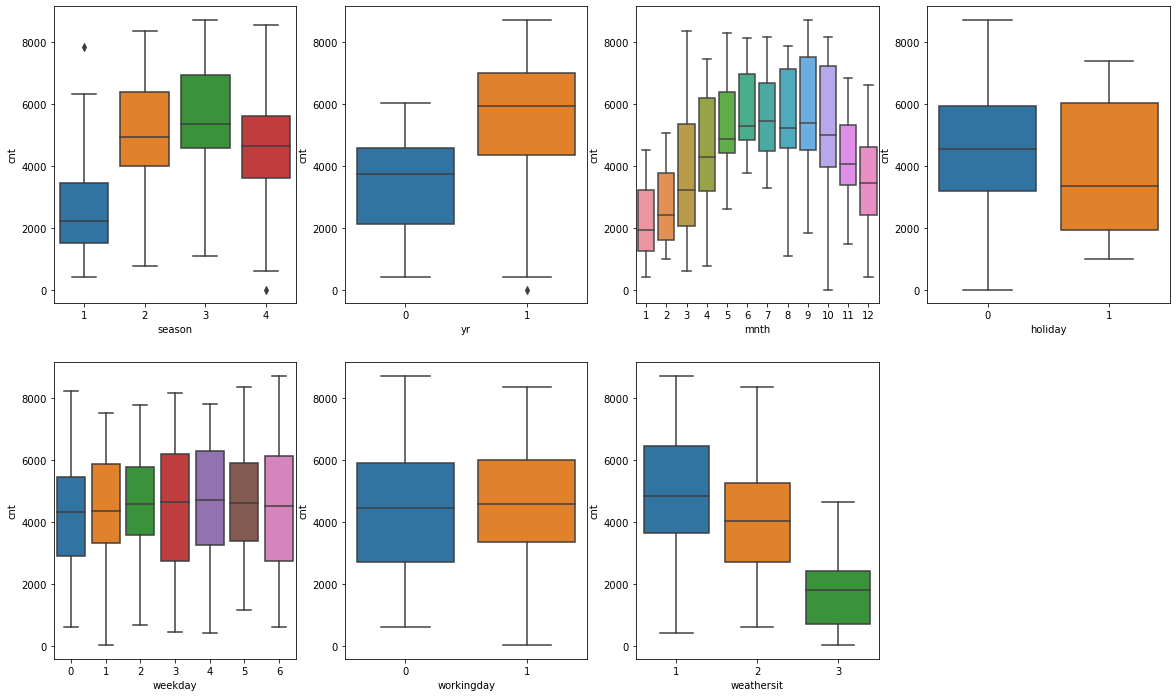

In [9]:
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=boom)
plt.subplot(2, 4, 2)
sns.boxplot(x='yr', y='cnt', data=boom)
plt.subplot(2, 4, 3)
sns.boxplot(x='mnth', y='cnt', data=boom)
plt.subplot(2, 4, 4)
sns.boxplot(x='holiday', y='cnt', data=boom)
plt.subplot(2, 4, 5)
sns.boxplot(x='weekday', y='cnt', data=boom)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=boom)
plt.subplot(2, 4, 7)
sns.boxplot(x='weathersit', y='cnt', data=boom)
plt.show()

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


#### As per the above mapping
- bike rental is least in spring when compaired with other seasons
- bike rental is more in 2019 
- bike rental goes beyond 40000 from May to Nov
- more bikes are rented on a holiday
- most bikes are rented in middle of the week
- pattern of bike rental is same for working / non working day
- bike rental is high on a clear day, and no one rented bike on a rainy day.

# step 2 : preparing the data 

In [10]:
#droping the non useful columns from data set
boom.drop(['instant','atemp','casual','registered','dteday'], axis = 1, inplace = True)


In [11]:
# mapping the catagorical variables
boom['season']=boom.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom['mnth']=boom.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom['weekday']=boom.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
boom['weathersit']=boom.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})


In [12]:
# creating dummy columns for catagorical variables with more than 2 categories 
season_1 = pd.get_dummies(boom.season, drop_first=True)
mnth_1 = pd.get_dummies(boom.mnth, drop_first=True)
weekday_1 = pd.get_dummies(boom.weekday, drop_first=True)
weathersit_1 = pd.get_dummies(boom.weathersit, drop_first=True)


In [13]:
# concating the dummy columns to the main data set
boom = pd.concat([boom,season_1,mnth_1,weekday_1,weathersit_1], axis=1)
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
boom.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
boom.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   spring         730 non-null    uint8  
 8   summer         730 non-null    uint8  
 9   winter         730 non-null    uint8  
 10  Aug            730 non-null    uint8  
 11  Dec            730 non-null    uint8  
 12  Feb            730 non-null    uint8  
 13  Jan            730 non-null    uint8  
 14  July           730 non-null    uint8  
 15  June           730 non-null    uint8  
 16  Mar            730 non-null    uint8  
 17  May            730 non-null    uint8  
 18  Nov       

## spliting into train and test

In [16]:
boom_train, boom_test = train_test_split(boom, train_size=0.7,test_size=0.3)
print(boom_train.shape)
print(boom_test.shape)

(510, 29)
(219, 29)


### rescaling
- min max

In [17]:
boom_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
185,0,0,1,30.613347,59.0417,8.459286,4665,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
341,0,0,1,10.899153,58.0000,16.083886,3322,0,0,1,...,0,0,0,0,0,1,0,0,0,0
568,1,0,1,30.408347,69.4167,9.291761,6966,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
# 1. initiating an object
scaler = MinMaxScaler()

# 2. creating list of numeric variables
num_var = ['temp','hum','windspeed','cnt'] 

# 3. fit & transform the scaler
boom_train[num_var] = scaler.fit_transform(boom_train[num_var])

In [19]:
boom_train[num_var].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.543023,0.556712,0.350076,0.485716
std,0.231577,0.179808,0.162942,0.236874
min,0.000000,0.000000,0.000000,0.000000
25%,0.341803,0.422199,0.229473,0.320053
50%,0.537996,0.554700,0.330128,0.489436
75%,0.748692,0.689724,0.438484,0.658789
max,1.000000,1.000000,1.000000,1.000000


## step 3 : training the model


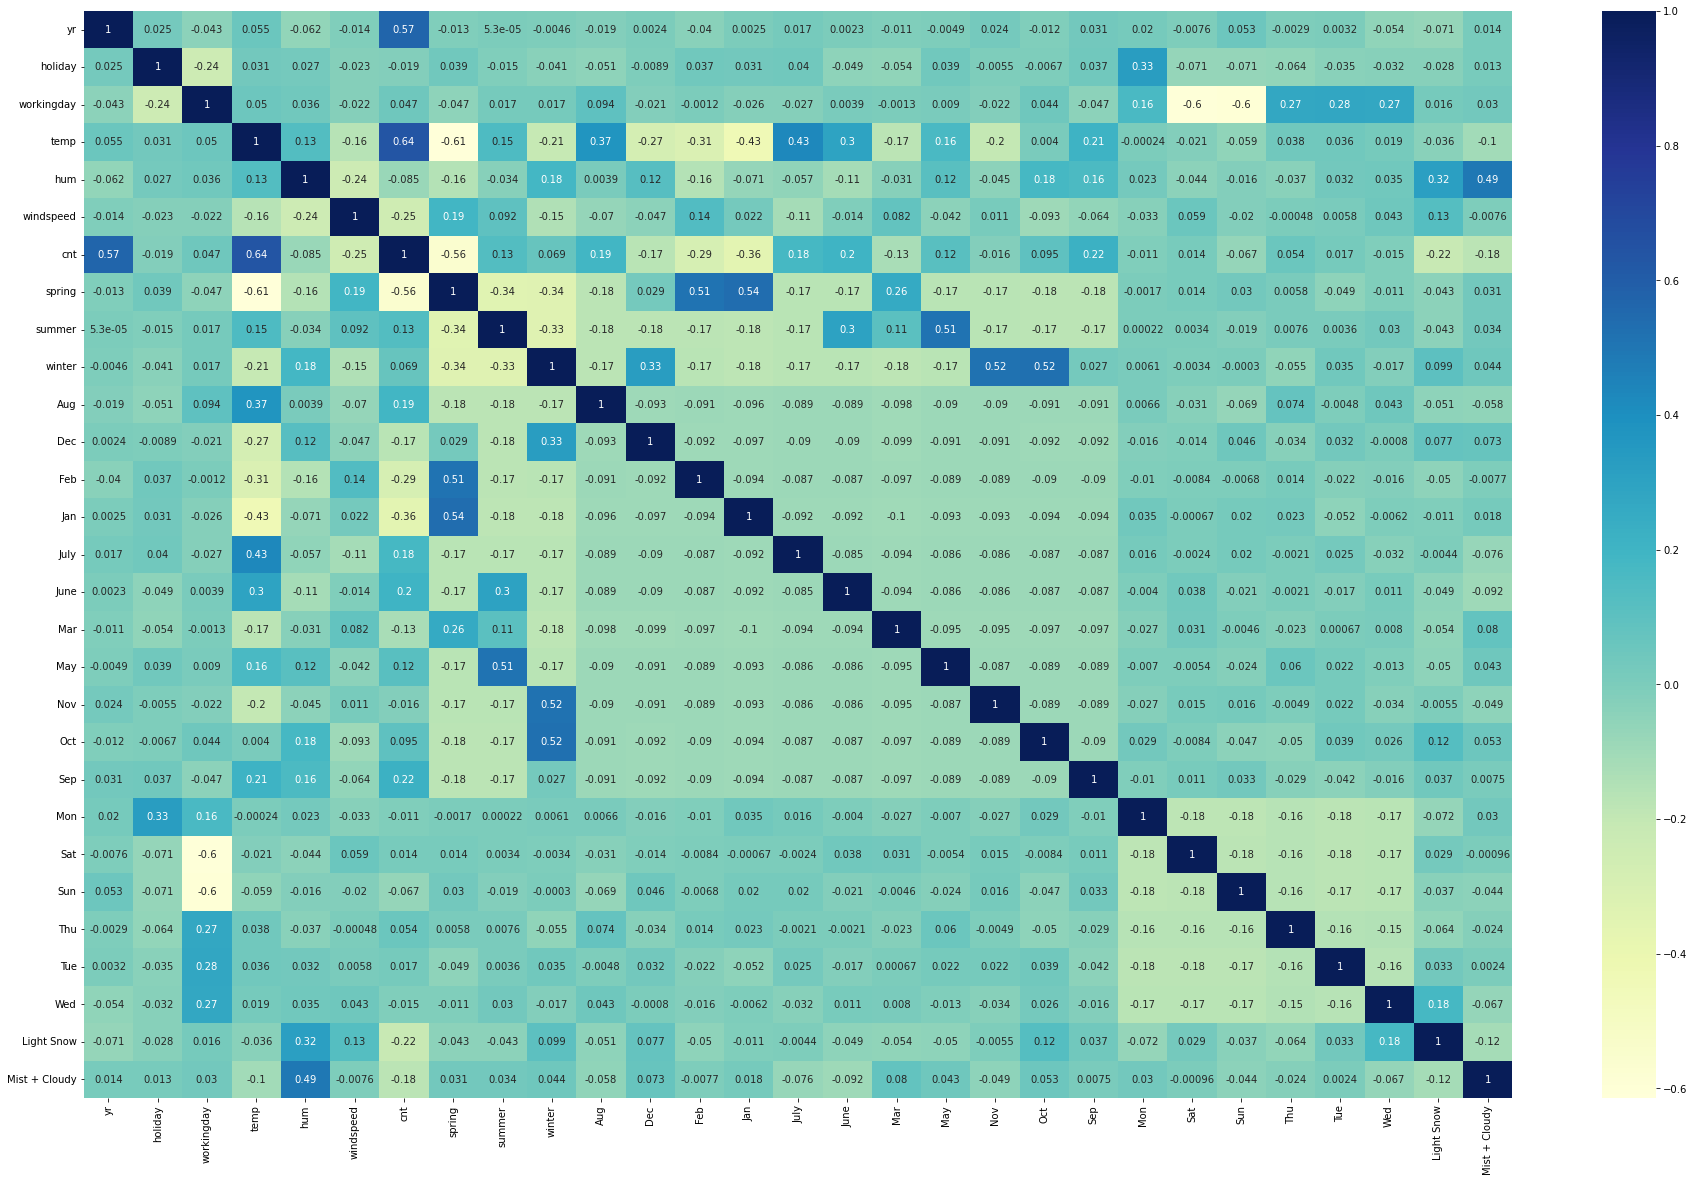

In [20]:
# heatmap 
plt.figure(figsize = (32,20))
sns.heatmap(boom_train.corr(),annot = True, cmap ='YlGnBu')
plt.show()

### Adding all variable to the model

In [21]:
boom.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [22]:
# X_train, y_train

y_train = boom_train.pop('cnt')
X_train = boom_train
X_train.head()


,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
185,0,0,1,0.870259,0.513011,0.214126,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0.178308,0.513034,0.284297,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
341,0,0,1,0.261637,0.499734,0.448731,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
568,1,0,1,0.863930,0.645247,0.239741,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0.173705,0.317820,0.465740,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
y_train.head()

185    0.511167
3      0.136545
341    0.349028
568    0.788965
2      0.110829
Name: cnt, dtype: float64

In [24]:
# adding constant
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.5
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.72e-181
Time:                        00:45:55   Log-Likelihood:                 500.08
No. Observations:                 510   AIC:                            -944.2
Df Residuals:                     482   BIC:                            -825.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2540      0.036      6.998      0.000       0.183       0.325
yr                0.2522      0.008     29.896      0.000       0.236       0.269
holiday           0.0445      0.025      1.754      0.080      -0.005       0.094
workingday        0.0814      0.013      6.396      0.000       0.056       0.106
temp              0.4584      0.047      9.689      0.000       0.365       0.551
hum              -0.1520      0.035     -4.310      0.000      -0.221      -0.083
windspeed        -0.1834      0.029     -6.369      0.000      -0.240      -0.127
spring           -0.1142      0.031     -3.662      0.000      -0.176      -0.053
summer           -0.0227      0.028     -0.816      0.415      -0.077       0.032
winter            0.1024      0.028      3.715      0.000       0.048       0.156
Aug              -0.0437      0.036     -1.223      0.222      -0.114       0.027
Dec              -0.0967      0.035     -2.740      0.006      -0.166      -0.027
Feb              -0.0409      0.034     -1.214      0.225      -0.107       0.025
Jan              -0.0592      0.035     -1.696      0.091      -0.128       0.009
July             -0.0852      0.037     -2.319      0.021      -0.157      -0.013
June             -0.0012      0.025     -0.049      0.961      -0.050       0.048
Mar               0.0052      0.026      0.202      0.840      -0.045       0.055
May               0.0174      0.022      0.791      0.429      -0.026       0.061
Nov              -0.1060      0.038     -2.776      0.006      -0.181      -0.031
Oct              -0.0440      0.037     -1.181      0.238      -0.117       0.029
Sep               0.0277      0.033      0.829      0.408      -0.038       0.093
Mon              -0.0176      0.016     -1.082      0.280      -0.049       0.014
Sat               0.0944      0.014      6.674      0.000       0.067       0.122
Sun               0.0337      0.014      2.426      0.016       0.006       0.061
Thu               0.0139      0.016      0.847      0.398      -0.018       0.046
Tue              -0.0069      0.016     -0.432      0.666      -0.038       0.024
Wed               0.0133      0.016      0.812      0.417      -0.019       0.045
Light Snow       -0.2170      0.031     -7.014      0.000      -0.278      -0.156
Mist + Cloudy    -0.0544      0.012     -4.652      0.000      -0.077      -0.031
==============================================================================
Omnibus:                       71.340   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.670
Skew:                          -0.715   Prob(JB):                     1.59e-39
Kurtosis:                       5.523   Cond. No.                     1.60e+15
================================================================

### VIF

In [25]:
#calculating the VIF of the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,81.34
21,Sat,18.23
22,Sun,17.64
6,spring,10.81
7,summer,8.58
8,winter,8.26
3,temp,7.01
17,Nov,6.31
18,Oct,6.13
12,Jan,5.86


## Feature Selection using RFE(Recursive Feature Elimination)

In [26]:
#creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 12),
 ('May', False, 10),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('Mon', False, 11),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 7),
 ('Tue', False, 14),
 ('Wed', False, 8),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', False, 2)]

In [28]:
# RFE Selected Features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Dec', 'July', 'Nov', 'Sep', 'Sat', 'Sun', 'Light Snow'],
      dtype='object')

In [29]:
true_rfe = X_train.columns[rfe.support_]

In [30]:
false_rfe = X_train.columns[~(rfe.support_)]


## Building Model using statsmodels for the detailed statistics



In [31]:
X_train_rfe = X_train[true_rfe]


In [32]:
#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.240757
yr            0.248463
holiday       0.027432
workingday    0.080869
temp          0.512882
hum          -0.250502
windspeed    -0.203248
spring       -0.114461
winter        0.090205
Dec          -0.051291
July         -0.074034
Nov          -0.055594
Sep           0.057691
Sat           0.094007
Sun           0.038448
Light Snow   -0.158858
dtype: float64

In [33]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.57e-187
Time:                        00:45:56   Log-Likelihood:                 479.73
No. Observations:                 510   AIC:                            -929.5
Df Residuals:                     495   BIC:                            -866.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2408      0.024     10.120      0.000       0.194       0.288
yr             0.2485      0.009     28.970      0.000       0.232       0.265
holiday        0.0274      0.022      1.248      0.212      -0.016       0.071
workingday     0.0809      0.009      8.777      0.000       0.063       0.099
temp           0.5129      0.032     15.805      0.000       0.449       0.577
hum           -0.2505      0.027     -9.174      0.000      -0.304      -0.197
windspeed     -0.2032      0.028     -7.171      0.000      -0.259      -0.148
spring        -0.1145      0.016     -7.253      0.000      -0.145      -0.083
winter         0.0902      0.015      6.076      0.000       0.061       0.119
Dec           -0.0513      0.018     -2.875      0.004      -0.086      -0.016
July          -0.0740      0.018     -4.047      0.000      -0.110      -0.038
Nov           -0.0556      0.020     -2.749      0.006      -0.095      -0.016
Sep            0.0577      0.016      3.510      0.000       0.025       0.090
Sat            0.0940      0.012      8.014      0.000       0.071       0.117
Sun            0.0384      0.012      3.307      0.001       0.016       0.061
Light Snow    -0.1589      0.028     -5.586      0.000      -0.215      -0.103
==============================================================================
Omnibus:                       62.311   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.745
Skew:                          -0.684   Prob(JB):                     2.47e-29
Kurtosis:                       5.081   Cond. No.                     1.49e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.19e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
#calculating the VIF of the model
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,31.28
12,Sat,7.84
13,Sun,7.62
3,temp,3.13
6,spring,2.62
1,holiday,2.37
7,winter,2.27
10,Nov,1.68
8,Dec,1.39
9,July,1.34


## analysing the columns to be droped
##### -High p-value, high VIF : definitely drop
##### -High-Low:
##### -High p, low VIF : remove these first, then build model again and check VIF again
#####   -Low p, high VIF : remove these later
##### -Low p-value, low VIF : keep variable



In [35]:
# removing workday due to very high vif
XX_old = X_train_rfe
XX = XX_old.drop(['workingday'], axis = 1)
#X_train_new_1 = X_train_rfe.drop(['workingday'], axis = 1)


In [36]:
#adding constant to training variable
XX = sm.add_constant(XX)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, XX)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.321626
yr            0.248463
holiday      -0.053437
temp          0.512882
hum          -0.250502
windspeed    -0.203248
spring       -0.114461
winter        0.090205
Dec          -0.051291
July         -0.074034
Nov          -0.055594
Sep           0.057691
Sat           0.013138
Sun          -0.042421
Light Snow   -0.158858
dtype: float64

In [37]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.57e-187
Time:                        00:45:56   Log-Likelihood:                 479.73
No. Observations:                 510   AIC:                            -929.5
Df Residuals:                     495   BIC:                            -866.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3216      0.029     11.077      0.000       0.265       0.379
yr             0.2485      0.009     28.970      0.000       0.232       0.265
holiday       -0.0534      0.026     -2.030      0.043      -0.105      -0.002
temp           0.5129      0.032     15.805      0.000       0.449       0.577
hum           -0.2505      0.027     -9.174      0.000      -0.304      -0.197
windspeed     -0.2032      0.028     -7.171      0.000      -0.259      -0.148
spring        -0.1145      0.016     -7.253      0.000      -0.145      -0.083
winter         0.0902      0.015      6.076      0.000       0.061       0.119
Dec           -0.0513      0.018     -2.875      0.004      -0.086      -0.016
July          -0.0740      0.018     -4.047      0.000      -0.110      -0.038
Nov           -0.0556      0.020     -2.749      0.006      -0.095      -0.016
Sep            0.0577      0.016      3.510      0.000       0.025       0.090
Sat            0.0131      0.012      1.088      0.277      -0.011       0.037
Sun           -0.0424      0.012     -3.474      0.001      -0.066      -0.018
Light Snow    -0.1589      0.028     -5.586      0.000      -0.215      -0.103
==============================================================================
Omnibus:                       62.311   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.745
Skew:                          -0.684   Prob(JB):                     2.47e-29
Kurtosis:                       5.081   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#calculating the VIF of the model

XX = XX.drop(['const'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = XX.columns
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,11.37
3,hum,10.83
4,windspeed,5.01
6,winter,2.74
5,spring,2.35
0,yr,2.00
9,Nov,1.78
7,Dec,1.50
8,July,1.44
10,Sep,1.23


In [39]:
# removing hum due to very high vif
XX_old = XX
XX = XX_old.drop(['hum'], axis = 1)


In [40]:
#adding constant to training variable
XX = sm.add_constant(XX)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, XX)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.192535
yr            0.253296
holiday      -0.061346
temp          0.463983
windspeed    -0.138911
spring       -0.123869
winter        0.071711
Dec          -0.064509
July         -0.051537
Nov          -0.045385
Sep           0.044170
Sat           0.017224
Sun          -0.042422
Light Snow   -0.250113
dtype: float64

In [41]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     166.5
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.16e-171
Time:                        00:45:56   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1925      0.027      7.015      0.000       0.139       0.246
yr             0.2533      0.009     27.382      0.000       0.235       0.271
holiday       -0.0613      0.028     -2.158      0.031      -0.117      -0.005
temp           0.4640      0.035     13.414      0.000       0.396       0.532
windspeed     -0.1389      0.030     -4.681      0.000      -0.197      -0.081
spring        -0.1239      0.017     -7.279      0.000      -0.157      -0.090
winter         0.0717      0.016      4.512      0.000       0.040       0.103
Dec           -0.0645      0.019     -3.357      0.001      -0.102      -0.027
July          -0.0515      0.020     -2.631      0.009      -0.090      -0.013
Nov           -0.0454      0.022     -2.080      0.038      -0.088      -0.003
Sep            0.0442      0.018      2.497      0.013       0.009       0.079
Sat            0.0172      0.013      1.321      0.187      -0.008       0.043
Sun           -0.0424      0.013     -3.215      0.001      -0.068      -0.016
Light Snow    -0.2501      0.029     -8.688      0.000      -0.307      -0.194
==============================================================================
Omnibus:                       92.353   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.523
Skew:                          -0.952   Prob(JB):                     5.25e-46
Kurtosis:                       5.487   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#calculating the VIF of the model

XX = XX.drop(['const'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = XX.columns
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.08
3,windspeed,5.01
5,winter,2.42
0,yr,2.00
4,spring,1.80
8,Nov,1.77
6,Dec,1.45
7,July,1.38
10,Sat,1.23
11,Sun,1.23


In [43]:
# removing sat due to very p-value 

XX_old = XX
XX = XX_old.drop(['Sat'], axis = 1)

In [44]:
#adding constant to training variable
XX = sm.add_constant(XX)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, XX)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.195628
yr            0.253374
holiday      -0.064577
temp          0.462785
windspeed    -0.137084
spring       -0.123918
winter        0.071458
Dec          -0.064582
July         -0.050837
Nov          -0.044888
Sep           0.044998
Sun          -0.045689
Light Snow   -0.249634
dtype: float64

In [45]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          3.75e-172
Time:                        00:45:56   Log-Likelihood:                 438.80
No. Observations:                 510   AIC:                            -851.6
Df Residuals:                     497   BIC:                            -796.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1956      0.027      7.148      0.000       0.142       0.249
yr             0.2534      0.009     27.371      0.000       0.235       0.272
holiday       -0.0646      0.028     -2.278      0.023      -0.120      -0.009
temp           0.4628      0.035     13.374      0.000       0.395       0.531
windspeed     -0.1371      0.030     -4.621      0.000      -0.195      -0.079
spring        -0.1239      0.017     -7.277      0.000      -0.157      -0.090
winter         0.0715      0.016      4.493      0.000       0.040       0.103
Dec           -0.0646      0.019     -3.358      0.001      -0.102      -0.027
July          -0.0508      0.020     -2.594      0.010      -0.089      -0.012
Nov           -0.0449      0.022     -2.056      0.040      -0.088      -0.002
Sep            0.0450      0.018      2.544      0.011       0.010       0.080
Sun           -0.0457      0.013     -3.522      0.000      -0.071      -0.020
Light Snow    -0.2496      0.029     -8.666      0.000      -0.306      -0.193
==============================================================================
Omnibus:                       87.515   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.491
Skew:                          -0.900   Prob(JB):                     2.91e-44
Kurtosis:                       5.488   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#calculating the VIF of the model

XX = XX.drop(['const'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = XX.columns
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.04
3,windspeed,4.96
5,winter,2.42
0,yr,2.00
4,spring,1.79
8,Nov,1.77
6,Dec,1.45
7,July,1.38
9,Sep,1.22
10,Sun,1.19


In [47]:
# removing winter due to very p-value 

XX_old = XX
XX = XX_old.drop(['winter'], axis = 1)

In [48]:
#adding constant to training variable
XX = sm.add_constant(XX)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, XX)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.248307
yr            0.253455
holiday      -0.066648
temp          0.416149
windspeed    -0.159279
spring       -0.156374
Dec          -0.034665
July         -0.055774
Nov           0.000017
Sep           0.052587
Sun          -0.048149
Light Snow   -0.238623
dtype: float64

In [49]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          5.05e-169
Time:                        00:45:56   Log-Likelihood:                 428.64
No. Observations:                 510   AIC:                            -833.3
Df Residuals:                     498   BIC:                            -782.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2483      0.025      9.854      0.000       0.199       0.298
yr             0.2535      0.009     26.867      0.000       0.235       0.272
holiday       -0.0666      0.029     -2.308      0.021      -0.123      -0.010
temp           0.4161      0.034     12.371      0.000       0.350       0.482
windspeed     -0.1593      0.030     -5.343      0.000      -0.218      -0.101
spring        -0.1564      0.016     -9.950      0.000      -0.187      -0.125
Dec           -0.0347      0.018     -1.885      0.060      -0.071       0.001
July          -0.0558      0.020     -2.797      0.005      -0.095      -0.017
Nov         1.691e-05      0.020      0.001      0.999      -0.039       0.039
Sep            0.0526      0.018      2.930      0.004       0.017       0.088
Sun           -0.0481      0.013     -3.646      0.000      -0.074      -0.022
Light Snow    -0.2386      0.029     -8.158      0.000      -0.296      -0.181
==============================================================================
Omnibus:                       68.145   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.379
Skew:                          -0.786   Prob(JB):                     2.19e-28
Kurtosis:                       4.877   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#calculating the VIF of the model

XX = XX.drop(['const'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = XX.columns
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,windspeed,4.96
2,temp,4.92
0,yr,1.99
4,spring,1.72
6,July,1.35
8,Sep,1.21
9,Sun,1.19
7,Nov,1.16
5,Dec,1.11
10,Light Snow,1.07


## step 4: residual analysis

In [51]:
XX = sm.add_constant(XX)
#X_train_lm5.columns
XX

,const,yr,holiday,temp,windspeed,spring,Dec,July,Nov,Sep,Sun,Light Snow
185,1.0,0,0,0.870259,0.214126,0,0,1,0,0,0,0
3,1.0,0,0,0.178308,0.284297,1,0,0,0,0,0,0
341,1.0,0,0,0.261637,0.448731,0,1,0,0,0,0,0
568,1.0,1,0,0.863930,0.239741,0,0,1,0,0,0,0
2,1.0,0,0,0.173705,0.465740,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
388,1.0,1,0,0.358679,0.208991,1,0,0,0,0,0,0
143,1.0,0,0,0.760559,0.380769,0,0,0,0,0,0,0
442,1.0,1,0,0.614996,0.288463,1,0,0,0,0,0,0
289,1.0,0,0,0.601284,0.315391,0,0,0,0,0,0,0


In [53]:
y_train_pred = lr_model.predict(XX)


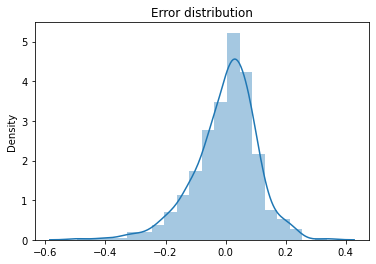

In [54]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res,bins =20)
plt.title('Error distribution')
plt.show()

## Making Predictions 

### Apply scaling on test set

In [55]:
#numeric variables 
num_var

['temp', 'hum', 'windspeed', 'cnt']

In [56]:
boom_test[num_var] = scaler.transform(boom_test[num_var])


In [57]:
boom_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
169,0,0,0,0.810135,0.610197,0.164117,0.520705,0,1,0,...,0,0,0,0,1,0,0,0,0,1
198,0,0,1,0.870259,0.590547,0.398730,0.486177,0,0,0,...,0,0,1,0,0,0,0,0,0,0
435,1,0,1,0.515845,0.383962,0.382050,0.587589,1,0,0,...,0,0,1,0,0,0,0,0,0,0
359,0,1,0,0.332401,0.406636,0.447508,0.106966,1,0,0,...,0,0,1,0,0,0,0,0,0,0
664,1,0,0,0.596010,0.678173,0.439730,0.895931,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [58]:
boom_test.describe()


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.506849,0.031963,0.716895,0.574272,0.568633,0.337961,0.505691,0.228311,0.251142,0.232877,...,0.086758,0.082192,0.118721,0.123288,0.127854,0.173516,0.136986,0.150685,0.031963,0.369863
std,0.501098,0.176306,0.451539,0.231725,0.185623,0.152759,0.225384,0.420705,0.434663,0.423633,...,0.282125,0.275286,0.324202,0.329520,0.334692,0.379560,0.344621,0.358561,0.176306,0.483873
min,0.000000,0.000000,0.000000,0.047329,-0.239512,0.051298,-0.049378,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.372919,0.428305,0.237169,0.357841,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.591791,0.562401,0.317944,0.506821,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.761614,0.695698,0.419882,0.677412,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.015822,0.987254,0.824380,0.932633,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# spliting into X and y test
y_test = boom_test.pop('cnt')
X_test = boom_test

In [60]:
y_test.head()

169    0.520705
198    0.486177
435    0.587589
359    0.106966
664    0.895931
Name: cnt, dtype: float64

In [61]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
169,0,0,0,0.810135,0.610197,0.164117,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
198,0,0,1,0.870259,0.590547,0.398730,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
435,1,0,1,0.515845,0.383962,0.382050,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
359,0,1,0,0.332401,0.406636,0.447508,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
664,1,0,0,0.596010,0.678173,0.439730,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [62]:
# using the model to make pridection

#droping the constant
XX.drop(columns= 'const', inplace = True)




In [63]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[XX.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [64]:
#making predictions
y_pred = lr_model.predict(X_test_new)

In [65]:
y_pred

169    0.511154
198    0.491181
435    0.499204
359    0.057670
664    0.679751
         ...   
362    0.125072
546    0.748444
216    0.538294
175    0.521786
726    0.369320
Length: 219, dtype: float64

## model eveluation


In [66]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.7864273252817915


In [67]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)


r2 score on the train set is 0.8053228663123634


## we noticed the r2 score has increased for training set

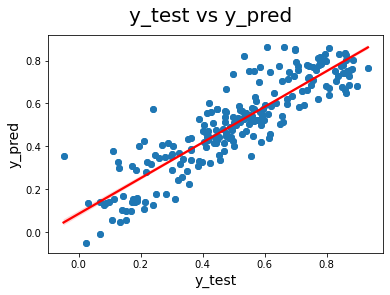

In [68]:
# Plotting y_test and y_pred

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

#### Final equation 
 cnt = 0.2376×yr -0.0769×holiday + 0.3685×temp -0.1077×windspeed - 0.1461×spring - 0.0.0553×july - 0.0.0788×oct + 0.0666×Sep - 0.0570×Sun - 0.2963×LightSnow - 0.0845×MistCloudy 

In [69]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.010901758905373307
Mean squared error of the test set is 0.01079954178482358


### mean squared error on train and test is close to zero hence the model stands true for training and test data 

# Conclusion
- Temperature plas a major role in bike renting, book bike can opt to maximise the operation in the area where weather is majorly pleasent
- In rainy season there is no business
- Sep month is the month of maximum business
- HOlidays impact the business negatively